In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, log_loss, make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [150]:
df=pd.read_csv('../metrics_compact.csv')
df.fillna(value = 0, inplace=True)

final = pd.get_dummies(df, columns=['usergroup'],drop_first=True)
#final['rating'] = final['rating'].apply(np.rint)
final.drop(['chat_id','conv_id'], axis=1, inplace=True)
final['rating'] =final['rating'].astype('int32')
print(len(final))
final.head()

762


,RR,RD,rating,duration,initiatedByUser,length,turnsByUser,numWords,usergroup_default
0,1.0,9.50,4,23,True,8,3,0.0,1
1,1.0,11.00,5,77,True,8,3,2.0,1
2,1.0,19.67,4,66,False,11,4,0.0,1
3,1.0,164.00,5,844,True,9,4,4.0,1
4,1.0,152.67,4,490,True,11,5,4.0,1


### Split Data

In [151]:
X = final.drop(['rating'],axis=1).values
y = final['rating'].values
#y = tf.keras.utils.to_categorical(y)


X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.25, random_state=42)


print(X_train.shape,y_train.shape,  'train shape')
#print(X_val.shape,y_val.shape, 'validation shape')
print(X_test.shape,y_test.shape, 'test shape')

(533, 8) (533,) train shape
(229, 8) (229,) test shape


## Scale Features

In [152]:
#scaler = MinMaxScaler()
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(X_train.shape,y_train.shape,  'train shape')
#print(X_val.shape,y_val.shape, 'validation shape')
print(X_test.shape,y_test.shape, 'test shape')

(533, 8) (533,) train shape
(229, 8) (229,) test shape


In [145]:
model0 = tf.keras.models.Sequential()
model0.add(tf.keras.layers.Dense(20,input_dim=8,  activation='relu'))
model0.add(tf.keras.layers.Dropout(0.5))
model0.add(tf.keras.layers.Dense(40, activation='relu'))
model0.add(tf.keras.layers.Dropout(0.5))
model0.add(tf.keras.layers.Dense(60, activation='relu'))
model0.add(tf.keras.layers.Dropout(0.5))
model0.add(tf.keras.layers.Dense(80, activation='relu'))
model0.add(tf.keras.layers.Dropout(0.5))
model0.add(tf.keras.layers.Dense(60, activation='relu'))
model0.add(tf.keras.layers.Dropout(0.5))
model0.add(tf.keras.layers.Dense(40, activation='relu'))
model0.add(tf.keras.layers.Dropout(0.5))
model0.add(tf.keras.layers.Dense(6, activation='softmax'))
# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model0.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [146]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience = 200)
model0.fit(x=X_train,y=y_train,
          validation_data=(X_val, y_val),
          batch_size=128,epochs=1500, callbacks=[early])

Train on 399 samples, validate on 134 samples
Epoch 1/1500
399/399 [==============================] - 1s 1ms/sample - loss: 1.7043 - accuracy: 0.3434 - val_loss: 1.4089 - val_accuracy: 0.5896
Epoch 2/1500
399/399 [==============================] - 0s 39us/sample - loss: 1.5046 - accuracy: 0.5439 - val_loss: 1.2991 - val_accuracy: 0.5896
Epoch 3/1500
399/399 [==============================] - 0s 50us/sample - loss: 1.3962 - accuracy: 0.5338 - val_loss: 1.3062 - val_accuracy: 0.5896
Epoch 4/1500
399/399 [==============================] - 0s 73us/sample - loss: 1.3160 - accuracy: 0.5514 - val_loss: 1.2889 - val_accuracy: 0.5896
Epoch 5/1500
399/399 [==============================] - 0s 56us/sample - loss: 1.2967 - accuracy: 0.5564 - val_loss: 1.2703 - val_accuracy: 0.5896
Epoch 6/1500
399/399 [==============================] - 0s 62us/sample - loss: 1.3631 - accuracy: 0.5589 - val_loss: 1.2854 - val_accuracy: 0.5896
Epoch 7/1500
399/399 [==============================] - 0s 50us/sample - 

399/399 [==============================] - 0s 40us/sample - loss: 0.9125 - accuracy: 0.7168 - val_loss: 0.8105 - val_accuracy: 0.7687
Epoch 112/1500
399/399 [==============================] - 0s 43us/sample - loss: 0.9231 - accuracy: 0.7043 - val_loss: 0.8125 - val_accuracy: 0.7687
Epoch 113/1500
399/399 [==============================] - 0s 42us/sample - loss: 0.9014 - accuracy: 0.7218 - val_loss: 0.8098 - val_accuracy: 0.7687
Epoch 114/1500
399/399 [==============================] - 0s 43us/sample - loss: 0.9481 - accuracy: 0.7293 - val_loss: 0.8143 - val_accuracy: 0.7687
Epoch 115/1500
399/399 [==============================] - 0s 42us/sample - loss: 0.9137 - accuracy: 0.7218 - val_loss: 0.8364 - val_accuracy: 0.7687
Epoch 116/1500
399/399 [==============================] - 0s 42us/sample - loss: 0.9591 - accuracy: 0.7018 - val_loss: 0.8354 - val_accuracy: 0.7687
Epoch 117/1500
399/399 [==============================] - 0s 43us/sample - loss: 0.9235 - accuracy: 0.7093 - val_loss: 0.

399/399 [==============================] - 0s 42us/sample - loss: 0.9442 - accuracy: 0.7043 - val_loss: 0.8282 - val_accuracy: 0.7687
Epoch 167/1500
399/399 [==============================] - 0s 41us/sample - loss: 0.9356 - accuracy: 0.7143 - val_loss: 0.8766 - val_accuracy: 0.7687
Epoch 168/1500
399/399 [==============================] - 0s 43us/sample - loss: 0.9204 - accuracy: 0.7068 - val_loss: 0.8769 - val_accuracy: 0.7687
Epoch 169/1500
399/399 [==============================] - 0s 43us/sample - loss: 0.9123 - accuracy: 0.7193 - val_loss: 0.8537 - val_accuracy: 0.7687
Epoch 170/1500
399/399 [==============================] - 0s 40us/sample - loss: 0.9270 - accuracy: 0.7118 - val_loss: 0.8289 - val_accuracy: 0.7687
Epoch 171/1500
399/399 [==============================] - 0s 47us/sample - loss: 0.9263 - accuracy: 0.7218 - val_loss: 0.8174 - val_accuracy: 0.7687
Epoch 172/1500
399/399 [==============================] - 0s 43us/sample - loss: 0.9156 - accuracy: 0.7218 - val_loss: 0.

399/399 [==============================] - 0s 45us/sample - loss: 0.9092 - accuracy: 0.7168 - val_loss: 0.8060 - val_accuracy: 0.7687
Epoch 222/1500
399/399 [==============================] - 0s 40us/sample - loss: 0.9022 - accuracy: 0.7218 - val_loss: 0.8046 - val_accuracy: 0.7687
Epoch 223/1500
399/399 [==============================] - 0s 44us/sample - loss: 0.9096 - accuracy: 0.7218 - val_loss: 0.8011 - val_accuracy: 0.7687
Epoch 224/1500
399/399 [==============================] - 0s 46us/sample - loss: 0.9041 - accuracy: 0.7193 - val_loss: 0.8013 - val_accuracy: 0.7687
Epoch 225/1500
399/399 [==============================] - 0s 47us/sample - loss: 0.9230 - accuracy: 0.7193 - val_loss: 0.8045 - val_accuracy: 0.7687
Epoch 226/1500
399/399 [==============================] - 0s 47us/sample - loss: 0.9005 - accuracy: 0.7243 - val_loss: 0.8084 - val_accuracy: 0.7687
Epoch 227/1500
399/399 [==============================] - 0s 50us/sample - loss: 0.9185 - accuracy: 0.7193 - val_loss: 0.

399/399 [==============================] - 0s 44us/sample - loss: 0.9444 - accuracy: 0.7143 - val_loss: 0.7907 - val_accuracy: 0.7687
Epoch 277/1500
399/399 [==============================] - ETA: 0s - loss: 1.0502 - accuracy: 0.67 - 0s 44us/sample - loss: 0.9410 - accuracy: 0.7143 - val_loss: 0.7910 - val_accuracy: 0.7687
Epoch 278/1500
399/399 [==============================] - 0s 42us/sample - loss: 0.9126 - accuracy: 0.7218 - val_loss: 0.7909 - val_accuracy: 0.7687
Epoch 279/1500
399/399 [==============================] - 0s 43us/sample - loss: 0.9104 - accuracy: 0.7193 - val_loss: 0.7884 - val_accuracy: 0.7687
Epoch 280/1500
399/399 [==============================] - 0s 44us/sample - loss: 0.9130 - accuracy: 0.7243 - val_loss: 0.7904 - val_accuracy: 0.7687
Epoch 281/1500
399/399 [==============================] - 0s 42us/sample - loss: 0.9339 - accuracy: 0.7168 - val_loss: 0.8171 - val_accuracy: 0.7687
Epoch 282/1500
399/399 [==============================] - 0s 41us/sample - loss

Epoch 331/1500
399/399 [==============================] - 0s 45us/sample - loss: 0.9315 - accuracy: 0.7143 - val_loss: 0.7919 - val_accuracy: 0.7687
Epoch 332/1500
399/399 [==============================] - 0s 46us/sample - loss: 0.9351 - accuracy: 0.7118 - val_loss: 0.8096 - val_accuracy: 0.7687
Epoch 333/1500
399/399 [==============================] - 0s 45us/sample - loss: 0.9489 - accuracy: 0.7068 - val_loss: 0.8376 - val_accuracy: 0.7687
Epoch 334/1500
399/399 [==============================] - 0s 43us/sample - loss: 0.9475 - accuracy: 0.7043 - val_loss: 0.8549 - val_accuracy: 0.7687
Epoch 335/1500
399/399 [==============================] - 0s 46us/sample - loss: 0.9150 - accuracy: 0.7068 - val_loss: 0.8482 - val_accuracy: 0.7687
Epoch 336/1500
399/399 [==============================] - 0s 45us/sample - loss: 0.9866 - accuracy: 0.6992 - val_loss: 0.8481 - val_accuracy: 0.7687
Epoch 337/1500
399/399 [==============================] - 0s 46us/sample - loss: 0.9188 - accuracy: 0.7018

Epoch 386/1500
399/399 [==============================] - 0s 44us/sample - loss: 0.9537 - accuracy: 0.7193 - val_loss: 0.8144 - val_accuracy: 0.7687
Epoch 387/1500
399/399 [==============================] - 0s 42us/sample - loss: 0.9579 - accuracy: 0.7043 - val_loss: 0.8074 - val_accuracy: 0.7687
Epoch 388/1500
399/399 [==============================] - 0s 44us/sample - loss: 0.9500 - accuracy: 0.7043 - val_loss: 0.8070 - val_accuracy: 0.7687
Epoch 389/1500
399/399 [==============================] - 0s 46us/sample - loss: 0.9253 - accuracy: 0.7193 - val_loss: 0.8049 - val_accuracy: 0.7687
Epoch 390/1500
399/399 [==============================] - 0s 50us/sample - loss: 0.9110 - accuracy: 0.7218 - val_loss: 0.8004 - val_accuracy: 0.7687
Epoch 391/1500
399/399 [==============================] - 0s 47us/sample - loss: 0.9340 - accuracy: 0.7218 - val_loss: 0.7962 - val_accuracy: 0.7687
Epoch 392/1500
399/399 [==============================] - 0s 44us/sample - loss: 0.9252 - accuracy: 0.7118

Epoch 441/1500
399/399 [==============================] - 0s 47us/sample - loss: 0.9707 - accuracy: 0.6942 - val_loss: 0.8273 - val_accuracy: 0.7687
Epoch 442/1500
399/399 [==============================] - 0s 44us/sample - loss: 0.9450 - accuracy: 0.7018 - val_loss: 0.8219 - val_accuracy: 0.7687
Epoch 443/1500
399/399 [==============================] - 0s 43us/sample - loss: 0.9541 - accuracy: 0.6942 - val_loss: 0.8228 - val_accuracy: 0.7687
Epoch 444/1500
399/399 [==============================] - 0s 45us/sample - loss: 0.9701 - accuracy: 0.7093 - val_loss: 0.8226 - val_accuracy: 0.7687
Epoch 445/1500
399/399 [==============================] - 0s 47us/sample - loss: 0.9474 - accuracy: 0.7093 - val_loss: 0.8164 - val_accuracy: 0.7687
Epoch 446/1500
399/399 [==============================] - 0s 42us/sample - loss: 0.9594 - accuracy: 0.6917 - val_loss: 0.8126 - val_accuracy: 0.7687
Epoch 447/1500
399/399 [==============================] - 0s 45us/sample - loss: 0.9785 - accuracy: 0.7043

Epoch 496/1500
399/399 [==============================] - 0s 45us/sample - loss: 0.9317 - accuracy: 0.7093 - val_loss: 0.7942 - val_accuracy: 0.7687
Epoch 497/1500
399/399 [==============================] - 0s 43us/sample - loss: 0.9311 - accuracy: 0.7168 - val_loss: 0.7932 - val_accuracy: 0.7687
Epoch 498/1500
399/399 [==============================] - 0s 44us/sample - loss: 0.9686 - accuracy: 0.7118 - val_loss: 0.7929 - val_accuracy: 0.7687
Epoch 499/1500
399/399 [==============================] - 0s 42us/sample - loss: 0.9256 - accuracy: 0.7168 - val_loss: 0.7928 - val_accuracy: 0.7687
Epoch 500/1500
399/399 [==============================] - 0s 46us/sample - loss: 0.9444 - accuracy: 0.7093 - val_loss: 0.7914 - val_accuracy: 0.7687
Epoch 501/1500
399/399 [==============================] - 0s 51us/sample - loss: 0.9227 - accuracy: 0.7243 - val_loss: 0.7937 - val_accuracy: 0.7687
Epoch 502/1500
399/399 [==============================] - 0s 49us/sample - loss: 0.9289 - accuracy: 0.7168

Epoch 551/1500
399/399 [==============================] - 0s 48us/sample - loss: 0.9152 - accuracy: 0.7168 - val_loss: 0.8304 - val_accuracy: 0.7612
Epoch 552/1500
399/399 [==============================] - 0s 44us/sample - loss: 0.9230 - accuracy: 0.7068 - val_loss: 0.8185 - val_accuracy: 0.7612
Epoch 553/1500
399/399 [==============================] - 0s 53us/sample - loss: 0.9641 - accuracy: 0.7168 - val_loss: 0.8209 - val_accuracy: 0.7612
Epoch 554/1500
399/399 [==============================] - 0s 47us/sample - loss: 0.9291 - accuracy: 0.7143 - val_loss: 0.8371 - val_accuracy: 0.7612
Epoch 555/1500
399/399 [==============================] - 0s 44us/sample - loss: 0.9060 - accuracy: 0.7168 - val_loss: 0.8399 - val_accuracy: 0.7612
Epoch 556/1500
399/399 [==============================] - 0s 48us/sample - loss: 0.9300 - accuracy: 0.7168 - val_loss: 0.8408 - val_accuracy: 0.7612
Epoch 557/1500
399/399 [==============================] - 0s 48us/sample - loss: 0.9275 - accuracy: 0.7193

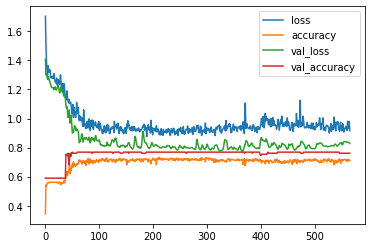

In [147]:
pd.DataFrame(model0.history.history).plot()

In [148]:
predictions = model0.predict_classes(X_test)

In [149]:
model0.evaluate(X_test, y_test, batch_size=32)

229/229 [==============================] - 0s 39us/sample - loss: 0.9229 - accuracy: 0.7118


[0.9229004695425909, 0.7117904]

In [124]:
y_test_real = [i.argmax() for i in y_test]

0.7161572052401747

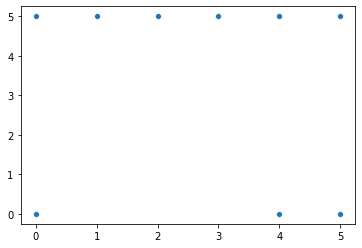

In [125]:
sns.scatterplot(y_test_real, predictions)
accuracy_score(y_test_real, predictions)

In [153]:
def create_model(learn_rate=0.01, dropout = 0.5):
    
    # create model
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(20,input_dim=8,  activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(40, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(60, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(80, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(60, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(40, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(20, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(6, activation='softmax'))
    
    # Compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learn_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [154]:
#from keras.wrappers.scikit_learn import KerasClassifier
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, epochs=32, batch_size=32, verbose=0)
# define the grid search parameters

batch_size = [32, 64]
epochs = [60,100]
learn_rate=[0.1,0.01, 0.001]
dropout = [0.4, 0.5]
param_grid = dict(batch_size=batch_size, epochs=epochs,learn_rate=learn_rate, dropout = dropout)

LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy')
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

#print(grid_result.cv_results_)

Best: 0.733606 using {'batch_size': 64, 'dropout': 0.5, 'epochs': 100, 'learn_rate': 0.01}
0.568558 with: {'batch_size': 32, 'dropout': 0.4, 'epochs': 60, 'learn_rate': 0.1}
0.733596 with: {'batch_size': 32, 'dropout': 0.4, 'epochs': 60, 'learn_rate': 0.01}
0.660562 with: {'batch_size': 32, 'dropout': 0.4, 'epochs': 60, 'learn_rate': 0.001}
0.568558 with: {'batch_size': 32, 'dropout': 0.4, 'epochs': 100, 'learn_rate': 0.1}
0.733596 with: {'batch_size': 32, 'dropout': 0.4, 'epochs': 100, 'learn_rate': 0.01}
0.726095 with: {'batch_size': 32, 'dropout': 0.4, 'epochs': 100, 'learn_rate': 0.001}
0.568558 with: {'batch_size': 32, 'dropout': 0.5, 'epochs': 60, 'learn_rate': 0.1}
0.669682 with: {'batch_size': 32, 'dropout': 0.5, 'epochs': 60, 'learn_rate': 0.01}
0.568558 with: {'batch_size': 32, 'dropout': 0.5, 'epochs': 60, 'learn_rate': 0.001}
0.568558 with: {'batch_size': 32, 'dropout': 0.5, 'epochs': 100, 'learn_rate': 0.1}
0.726105 with: {'batch_size': 32, 'dropout': 0.5, 'epochs': 100, '

In [155]:
result = pd.DataFrame(params)
result['score'] = means
result.sort_values('score', ascending=False)

,batch_size,dropout,epochs,learn_rate,score
22,64,0.5,100,0.010,0.733606
4,32,0.4,100,0.010,0.733596
1,32,0.4,60,0.010,0.733596
19,64,0.5,60,0.010,0.729861
13,64,0.4,60,0.010,0.729850
10,32,0.5,100,0.010,0.726105
5,32,0.4,100,0.001,0.726095
16,64,0.4,100,0.010,0.720487
7,32,0.5,60,0.010,0.669682
2,32,0.4,60,0.001,0.660562


In [156]:
y_pred=grid.predict(X_test)
acc=accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_pred, labels=[0,5])
print("Loss: ", loss)
print("Accuracy: ",acc)

Loss:  0.7541217553473955
Accuracy:  0.7074235807860262


## Save Model

In [16]:
grid.best_estimator_.model.save('keras_grid.h5')

/Users/pinarkaymaz/Documents/GitLab/Thesis/proactive-interaction-optimization/data-analysis/tensor/environ/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Restore Model

In [157]:
best_performing = tf.keras.models.load_model('keras_grid.h5')

In [158]:
y_pred_best=best_performing.predict(X_test)
y_pred_best = [i.argmax() for i in y_pred_best]
acc_best=accuracy_score(y_test, y_pred_best)
loss_best = log_loss(y_test, y_pred_best, labels=[0,5])
print("Loss: ", loss_best, "\nAccuracy: ", acc_best)

Loss:  0.30164870213895856 
Accuracy:  0.7205240174672489


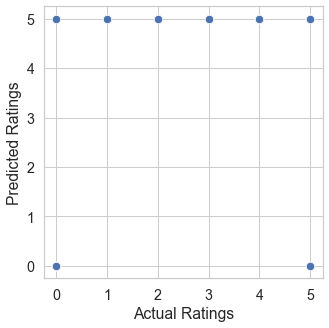

In [49]:
plt.figure(figsize=(5,5))
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")

keras=sns.scatterplot(x=y_test, y=y_pred_best, palette='viridis',  s=70)

plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
#plt.title("Linear Regression", y=1.025, fontsize = 16, loc='right')

keras_fig = keras.get_figure()
#keras_fig.savefig("../../documentation/images/keras.eps", format='eps', bbox_inches='tight')